## SQuAD Data Analysis

In [1]:
#load required packages
import nltk
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from access_data import get_data_frame



### Convert training json data into DataFrame

In [2]:
curr_dir = os.getcwd()
path = ['data','paragraphs','qas','answers']
#original = pd.io.json.json_normalize(json.loads(open(curr_dir+'/train-v1.1.json').read()))
global original
with open(curr_dir+'/train-v1.1.json', 'r') as read_training:
    original = json.load(read_training)
    #original = json.dumps(read_training)
js = pd.io.json.json_normalize(json.loads(open(curr_dir+'/train-v1.1.json').read()),path)
m = pd.io.json.json_normalize(json.loads(open(curr_dir+'/train-v1.1.json').read()),path[:-1])
r = pd.io.json.json_normalize(json.loads(open(curr_dir+'/train-v1.1.json').read()),path[:-2])
idx = np.repeat(r['context'].values, r.qas.str.len())
ndx  = np.repeat(m['id'].values,m['answers'].str.len())
m['context'] = idx
js['q_idx'] = ndx
main = pd.concat([m[['id','question', 'context']].set_index('id'),js.set_index('q_idx')],1).reset_index()
main['c_id'] = main['context'].factorize()[0]

In [3]:
main = get_data_frame()
main.head()

,index,question,context,answer_start,text,c_id
0,5733be284776f41900661182,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",515,Saint Bernadette Soubirous,0
1,5733be284776f4190066117f,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",188,a copper statue of Christ,0
2,5733be284776f41900661180,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",279,the Main Building,0
3,5733be284776f41900661181,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",381,a Marian place of prayer and reflection,0
4,5733be284776f4190066117e,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",92,a golden statue of the Virgin Mary,0


In [4]:
c_len = [len(c.split()) for c in r['context'].values]
print('number of context = {} \n max words in a context = {} \n min words in a context = {}'
      '\naverage length of context = {}'.format(len(c_len), max(c_len), min(c_len), int(np.mean(c_len))) )       


number of context = 18896 
 max words in a context = 653 
 min words in a context = 20
average length of context = 116


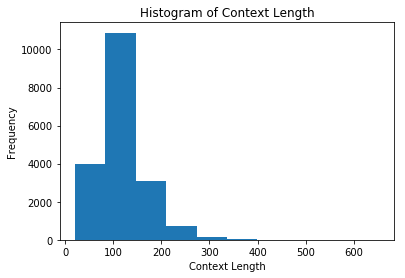

In [5]:
plt.hist(c_len);
plt.xlabel('Context Length');
plt.ylabel('Frequency');
plt.title('Histogram of Context Length');

In [6]:
q_len = [len(ans.split()) for ans in main['question']]
print('number of questions = {} \n max words in a question = {} \n min words in a question = {}'
      '\naverage length of question = {}'.format(len(q_len), max(q_len), min(q_len),int(np.mean(q_len))))   

number of questions = 87599 
 max words in a question = 40 
 min words in a question = 1
average length of question = 10


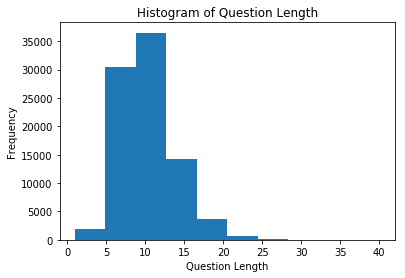

In [7]:
plt.hist(q_len);
plt.xlabel('Question Length');
plt.ylabel('Frequency');
plt.title('Histogram of Question Length');

In [8]:
ans_len = [len(ans.split()) for ans in main['text']]
print('number of answers = {} \n max words in a answer = {} \n min words in a answer = {}'
      '\naverage length of answer = {}'.format(len(ans_len), max(ans_len), min(ans_len),int(np.mean(ans_len))))   

number of answers = 87599 
 max words in a answer = 43 
 min words in a answer = 1
average length of answer = 3


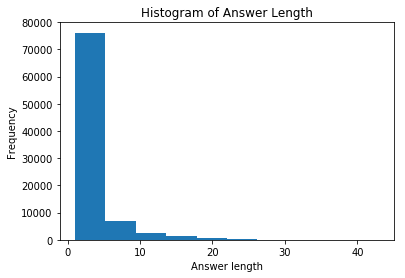

In [9]:
plt.hist(ans_len);
plt.xlabel('Answer length');
plt.ylabel('Frequency');
plt.title('Histogram of Answer Length');

In [10]:
count = main.groupby(['context']).size().reset_index(name='count')
questions_context_len  = np.array(count['count'])
print('Average number of questions per context = {}'.format(int(np.mean(questions_context_len))))
print('min number of questions per context = {} \nmax number of questions per context = {}'
      .format(min(questions_context_len), max(questions_context_len)))  

Average number of questions per context = 4
min number of questions per context = 1 
max number of questions per context = 25


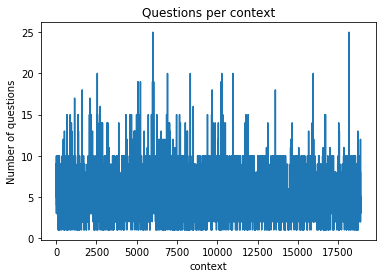

In [11]:
plt.plot(questions_context_len);
plt.xlabel('context');
plt.ylabel('Number of questions');
plt.title('Questions per context');

In [12]:
context_words = [(con.split()) for con in r['context'].values]
context_words[:2]

[['Architecturally,',
  'the',
  'school',
  'has',
  'a',
  'Catholic',
  'character.',
  'Atop',
  'the',
  'Main',
  "Building's",
  'gold',
  'dome',
  'is',
  'a',
  'golden',
  'statue',
  'of',
  'the',
  'Virgin',
  'Mary.',
  'Immediately',
  'in',
  'front',
  'of',
  'the',
  'Main',
  'Building',
  'and',
  'facing',
  'it,',
  'is',
  'a',
  'copper',
  'statue',
  'of',
  'Christ',
  'with',
  'arms',
  'upraised',
  'with',
  'the',
  'legend',
  '"Venite',
  'Ad',
  'Me',
  'Omnes".',
  'Next',
  'to',
  'the',
  'Main',
  'Building',
  'is',
  'the',
  'Basilica',
  'of',
  'the',
  'Sacred',
  'Heart.',
  'Immediately',
  'behind',
  'the',
  'basilica',
  'is',
  'the',
  'Grotto,',
  'a',
  'Marian',
  'place',
  'of',
  'prayer',
  'and',
  'reflection.',
  'It',
  'is',
  'a',
  'replica',
  'of',
  'the',
  'grotto',
  'at',
  'Lourdes,',
  'France',
  'where',
  'the',
  'Virgin',
  'Mary',
  'reputedly',
  'appeared',
  'to',
  'Saint',
  'Bernadette',
  'Soubi

In [13]:
question_words = [(ques.split()) for ques in main['question']]
question_words[:2]

[['To',
  'whom',
  'did',
  'the',
  'Virgin',
  'Mary',
  'allegedly',
  'appear',
  'in',
  '1858',
  'in',
  'Lourdes',
  'France?'],
 ['What',
  'is',
  'in',
  'front',
  'of',
  'the',
  'Notre',
  'Dame',
  'Main',
  'Building?']]

In [14]:
ans_words = [(ans.split()) for ans in main['text']]
ans_words[:2]

[['Saint', 'Bernadette', 'Soubirous'],
 ['a', 'copper', 'statue', 'of', 'Christ']]

In [15]:
c_words = []
q_words = []

In [16]:
for word in context_words:
    for w in word:
        c_words.append(w)

In [17]:
len(c_words)

2203849

In [18]:
for word in question_words:
    for w in word:
        q_words.append(w)

In [19]:
len(q_words)

881343

In [20]:
all_words =c_words+ q_words
print('total number of words = {}'.format(len(all_words)))

total number of words = 3085192


In [21]:
vocab = (set(all_words))
print('vocabulary  size = {}'.format(len(vocab)))

vocabulary  size = 210007
